In [11]:
import numpy as np
from skimage.io import imread
from matplotlib import pyplot
import pylab

%matplotlib inline

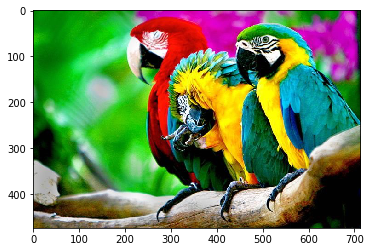

In [159]:
image = imread('../../data/parrots.jpg')
pylab.imshow(image)
image = skimage.img_as_float(image)

In [126]:
import skimage
img = skimage.img_as_float(image)

In [ ]:
h, w = img.shape[:-1]
img = img.reshape((h*w, 3))

In [160]:
def psnr(orig_img, comp_img):
    h, w = orig_img.shape[:-1]
    mse = np.sum(np.power(np.subtract(orig_img, comp_img), 2)) / (h*w*3)
    maxi = 1#np.max(image[:,:,1])
    return 20*np.log10(maxi) - 10*np.log10(mse)

In [144]:
from sklearn.cluster import KMeans
def calc_psrn(n_clusters):
    kmeans = KMeans(random_state=241, n_jobs=-1, n_clusters=n_clusters)
    clustered = kmeans.fit_predict(img)
    N = n_clusters
    medians = np.zeros((N, 3))
    means = np.zeros((N , 3))
    labeled = np.zeros((clustered.shape[0], 4))
    labeled[:,:-1] = img
    labeled[:, -1] = clustered
    for i in range(0, N):
        medians[i] = np.median(labeled[labeled[:, -1]==i], axis=0)[:-1]
        means[i] = np.mean(labeled[labeled[:, -1]==i], axis=0)[:-1]
    medianimg = np.zeros_like(img)
    meanimg = np.zeros_like(img)
    for i in range(0, img.shape[0]):
        medianimg[i] = medians[int(labeled[i, -1])]
        meanimg[i] = means[int(labeled[i, -1])]
    medianimg = medianimg.reshape((h, w, 3))
    meanimg = meanimg.reshape((h, w, 3))
    psmed = psnr(image, medianimg)
    psmean = psnr(image, meanimg)
    return {'meanimg': meanimg, 'medianimg': medianimg, 'psmed': psmed, 'psmean': psmean}

In [148]:
answers = []
for i in range(8, 21):
    answers.append(calc_psrn(i))

In [173]:
result = 0;
for i in range(0, len(answers)):
    psm = psnr(image, answers[i]['meanimg'])
    psd = psnr(image, answers[i]['medianimg'])
    if (psm > 20 or psd > 20):
        result = i + 8
        break;
np.savetxt('../../output/week6/task1.txt', [result], fmt='%i', newline='')

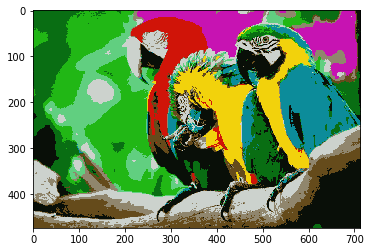

In [175]:
pylab.imshow(answers[i]['meanimg'])